In [1]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from sqlalchemy import inspect
from sqlalchemy import create_engine, text
import ast  # Para convertir texto en listas de Python

In [4]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from word2number import w2n

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [7]:
df = pd.read_csv("optimizacion_talento.csv")

In [8]:
df.head()

,Unnamed: 0,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,0,51,No,No Travel,Research & Development,6,3,Other,1,1,...,3,0,5,3,20,15,15,1972,195370.00,Sí
1,1,52,No,No Travel,Sales,1,4,Life Sciences,2,3,...,1,1,5,3,33,11,9,1971,199990.00,Sí
2,2,42,No,Travel Rarely,Sales,4,2,Technical Degree,3,3,...,4,0,3,3,22,11,15,1981,192320.00,Sí
3,3,47,No,Travel Rarely,Research & Development,2,4,Medical,4,1,...,2,2,2,3,20,5,6,1976,171690.00,No
4,4,46,No,No Travel,Sales,3,3,Technical Degree,5,1,...,4,1,5,3,19,2,8,1977,153407.04,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   age                       1614 non-null   int64  
 2   attrition                 1614 non-null   object 
 3   businesstravel            1614 non-null   object 
 4   department                1614 non-null   object 
 5   distancefromhome          1614 non-null   int64  
 6   education                 1614 non-null   int64  
 7   educationfield            1614 non-null   object 
 8   employeenumber            1614 non-null   int64  
 9   environmentsatisfaction   1614 non-null   int64  
 10  gender                    1614 non-null   object 
 11  jobinvolvement            1614 non-null   int64  
 12  joblevel                  1614 non-null   int64  
 13  jobrole                   1614 non-null   object 
 14  jobsatis

In [10]:
print(df.shape)

(1614, 29)


Obtenemos la matriz de correlación para poder ver las relaciones entre las variables

In [11]:
# Matriz de correlación
num_vars = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_vars].corr()

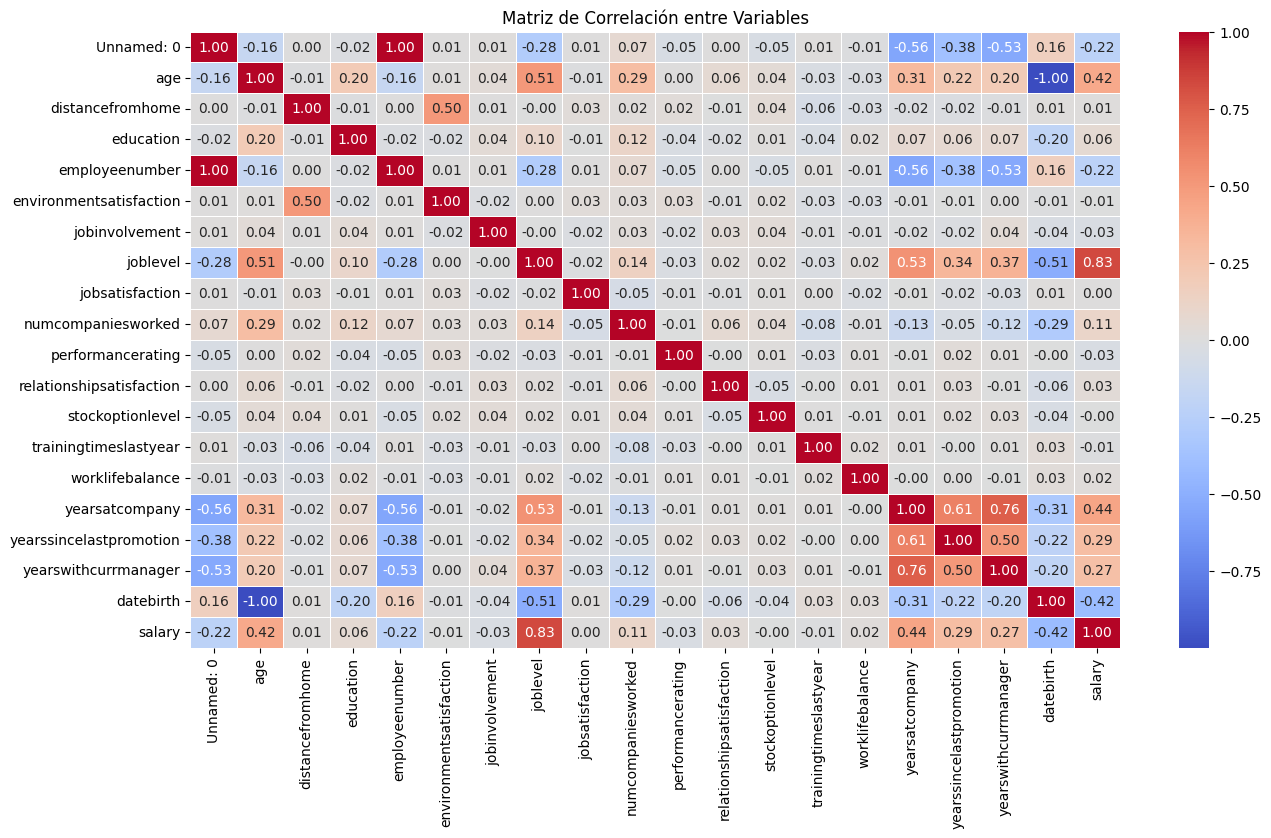

In [12]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

In [13]:
palettes = sns.color_palette("coolwarm", 2)
palettes4 = sns.color_palette("coolwarm", 4)

In [14]:
media_edad_salidas = df["attrition"]=="yes"
media_edad_salidas = df[media_edad_salidas]
media_edad_salidas

,Unnamed: 0,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework


In [15]:
media_edad_salidas.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distancefromhome,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employeenumber,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environmentsatisfaction,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jobinvolvement,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
joblevel,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jobsatisfaction,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcompaniesworked,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def grafico_pastel(df, columna, titulo):
    valores = df[columna].value_counts()
    plt.pie(valores, labels=valores.index, autopct="%1.1f%%", startangle=90)
    plt.title(titulo)
    plt.show()

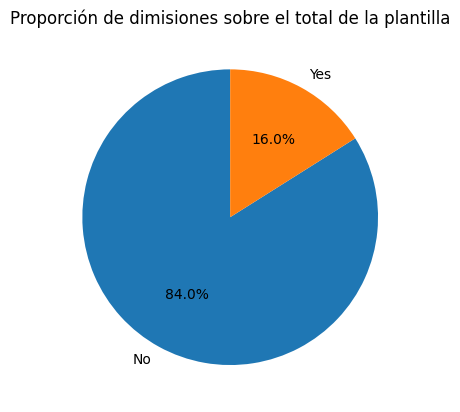

In [18]:
grafico_pastel(df, 'attrition', 'Proporción de dimisiones sobre el total de la plantilla')

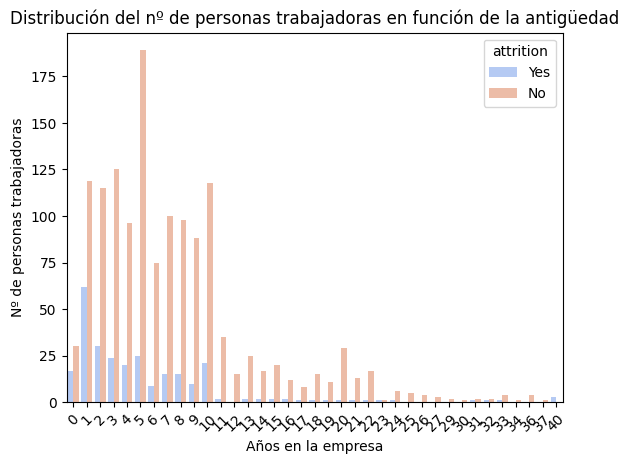

In [ ]:
sns.countplot(x='yearsatcompany', data=df, palette = palettes , hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Años en la empresa")
plt.ylabel("Nº de personas trabajadoras")
plt.title('Distribución del nº de personas trabajadoras en función de la antigüedad')
plt.show()

In [ ]:
grupo_veterania = df.groupby(['yearsatcompany', 'attrition'])['employeenumber'].count().reset_index()
grupo_veterania = grupo_veterania.rename(columns={'employeenumber': 'total'})
grupo_veterania

,yearsatcompany,attrition,total
0,0,No,30
1,0,Yes,17
2,1,No,119
3,1,Yes,62
4,2,No,115
...,...,...,...
59,33,Yes,1
60,34,No,1
61,36,No,4
62,37,No,1


In [ ]:
def clasificar_veterania(df, col='yearsatcompany'):
    df['veterania'] = df[col].apply(lambda x: '+ de 10 años' if x > 10 else '-= de 10 años')
    return df

In [ ]:
clasificar_veterania(df)

,Unnamed: 0,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework,veterania
0,0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes,+ de 10 años
1,1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1,+ de 10 años
2,2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1,+ de 10 años
3,3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False,+ de 10 años
4,4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0,+ de 10 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1673,43,No,NaN,488.944444,NaN,-26,3,Medical,1,824,2,1,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,NaN,NaN,12,"3,0",4,NaN,0,NaN,2,"3,0",3,NaN,1,2,"3949,17$",1980,NaN,NaN,NaN,Yes,-= de 10 años
1674,1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,4,1,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,Y,No,11,"3,0",3,Full Time,1,"27,0",2,"3,0",5,NaN,1,0,"15943,72$",1976,"191324,62$",NaN,NaN,False,-= de 10 años
1675,1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,3,0,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,NaN,No,19,"3,0",1,Part Time,0,"6,0",1,"3,0",6,NaN,1,5,NaN,1994,"28111,13$",NaN,NaN,False,-= de 10 años
1676,1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,3,1,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,NaN,4,"3,0",22,NaN,14,10,"8339,32$",1976,"100071,84$",NaN,NaN,Yes,+ de 10 años


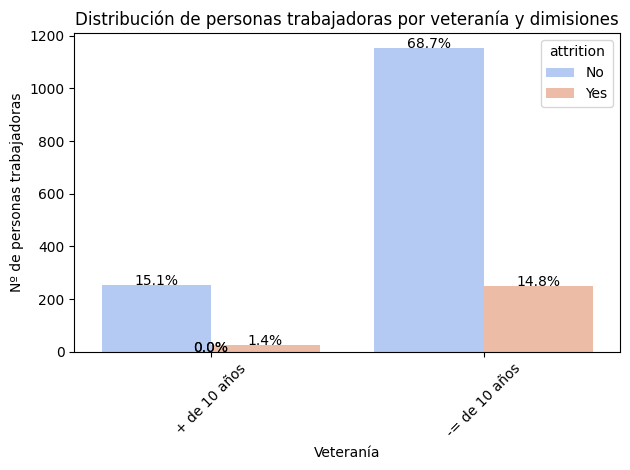

In [ ]:
grafico = sns.countplot(x='veterania', data= df, palette = palettes, hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Veteranía")
plt.ylabel("Nº de personas trabajadoras")

total = len(df)
for p in grafico.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    grafico.text(
        p.get_x() + p.get_width() / 2, 
        height + 1,  # Ajuste para que no tape la barra
        percentage, 
        ha='center'
    )

plt.title("Distribución de personas trabajadoras por veteranía y dimisiones")
plt.tight_layout()
plt.show()

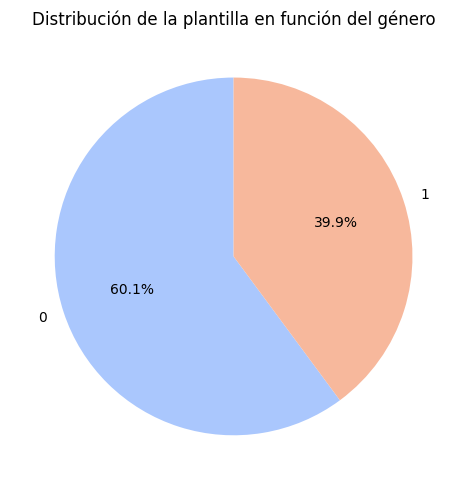

In [ ]:
estadistica.grafico_pastel(df, 'gender', 'Distribución de la plantilla en función del género')

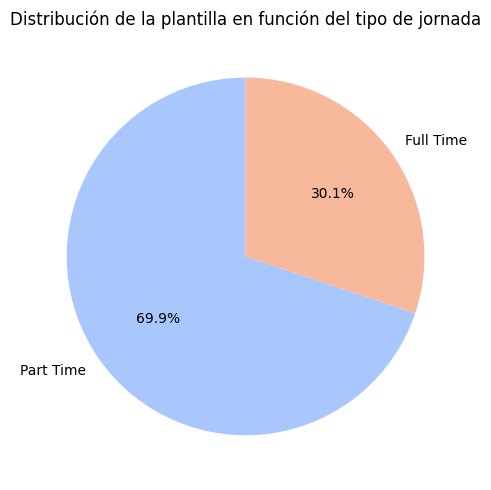

In [ ]:
estadistica.grafico_pastel(df, 'standardhours', 'Distribución de la plantilla en función del tipo de jornada')

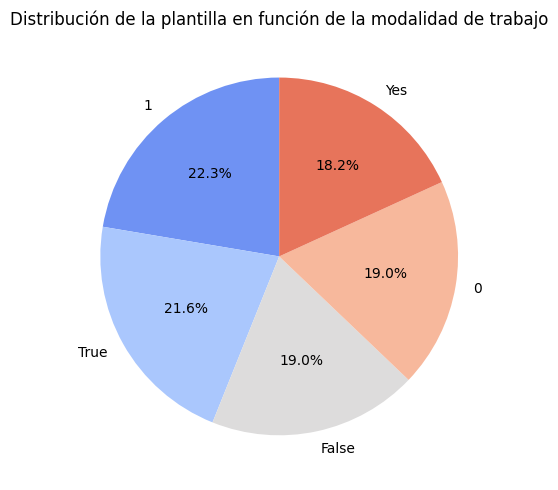

In [ ]:
estadistica.grafico_pastel(df, 'remotework', 'Distribución de la plantilla en función de la modalidad de trabajo')

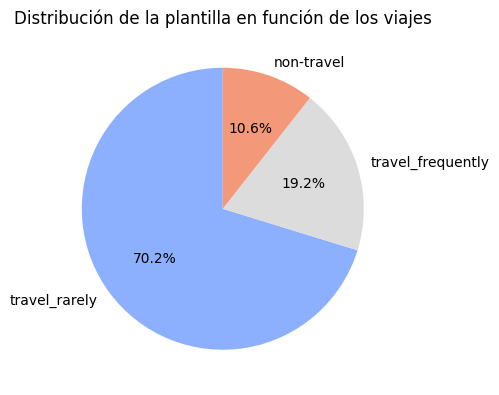

In [ ]:
estadistica.grafico_pastel(df, 'businesstravel', 'Distribución de la plantilla en función de los viajes')

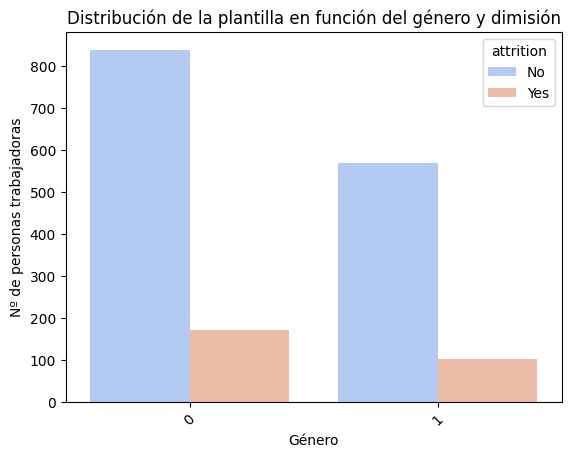

In [ ]:
sns.countplot(x='gender', data=df, palette = palettes, hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Género")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del género y dimisión")

plt.show()

In [ ]:
df_ylp_s = df.groupby("jobsatisfaction").agg({
    "employeenumber": "nunique",
    "yearssincelastpromotion": "mean"}).reset_index()
df_ylp_s

,jobsatisfaction,employeenumber,yearssincelastpromotion
0,1,317,2.389571
1,2,302,2.321767
2,3,481,2.100604
3,4,514,2.236059


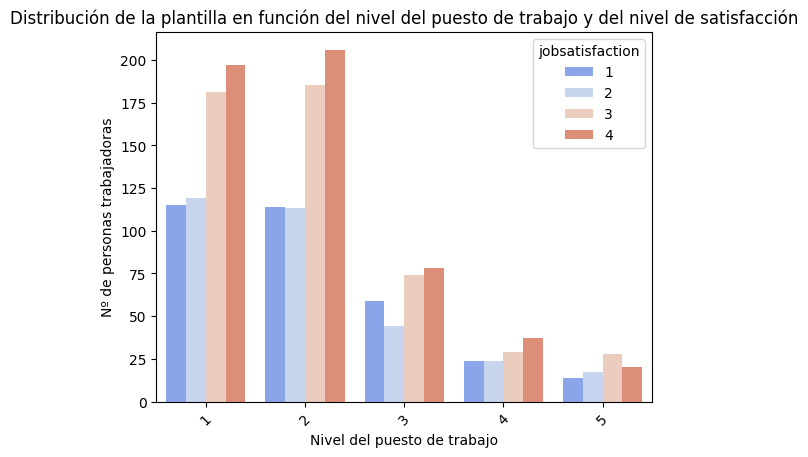

In [ ]:
sns.countplot(x='joblevel', data=df, palette = palettes4 , hue = 'jobsatisfaction')

plt.xticks(rotation=45)

plt.xlabel("Nivel del puesto de trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del nivel del puesto de trabajo y del nivel de satisfacción")
plt.show()

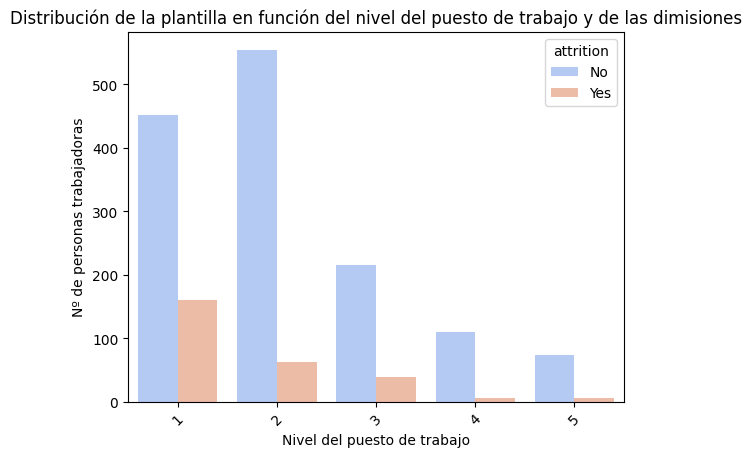

In [ ]:
sns.countplot(x='joblevel', data=df, palette = palettes, hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Nivel del puesto de trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del nivel del puesto de trabajo y de las dimisiones")
plt.show()

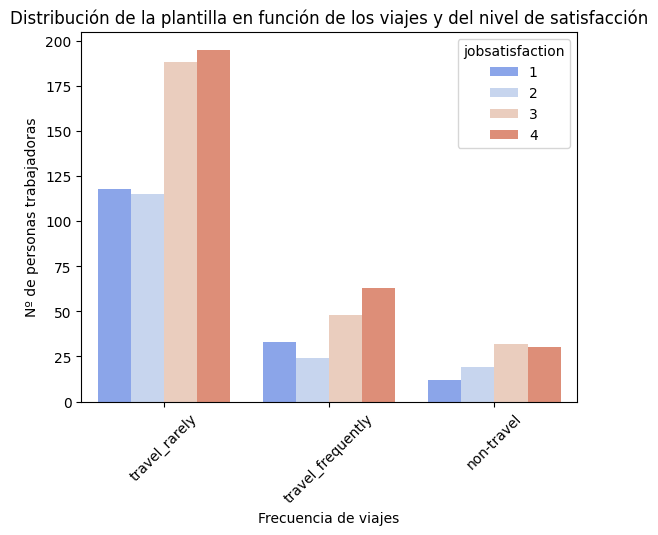

In [ ]:
sns.countplot(x='businesstravel', data=df, palette = palettes4, hue = 'jobsatisfaction')

plt.xticks(rotation=45)

plt.xlabel("Frecuencia de viajes")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función de los viajes y del nivel de satisfacción")
plt.show()

In [ ]:
print(df.columns)   # ver si están jobrole y jobsatisfaction
print(df['jobrole'].unique()[:5])   # ver algunos valores
print(df['jobsatisfaction'].unique())

Index(['Unnamed: 0', 'age', 'attrition', 'businesstravel', 'dailyrate',
       'department', 'distancefromhome', 'education', 'educationfield',
       'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome', 'datebirth', 'salary', 'roledepartament',
       'numberchildren', 'remotework', 'veterania'],
      dtype='object')
[' resEArch DIREcToR ' ' ManAGeR ' ' ManaGER ' ' ReseArCH DIrECtOr '
 ' sAleS EXECUtIve ']
[3 4 1 2]


In [ ]:
# Limpieza de la columna jobrole
df['jobrole'] = df['jobrole'].str.strip().str.title()

# Opcional: ver los valores únicos después de limpiar
print(df['jobrole'].unique())

['Research Director' 'Manager' 'Sales Executive' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Laboratory Technician'
 'Sales Representative' 'Human Resources']


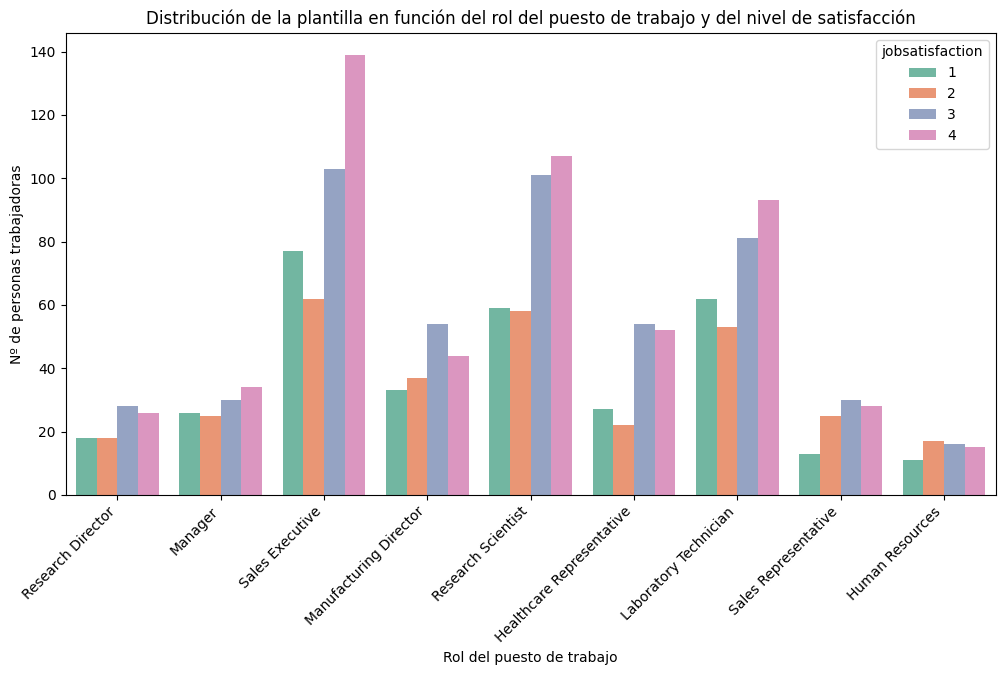

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='jobrole', data=df, hue='jobsatisfaction', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rol del puesto de trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del rol del puesto de trabajo y del nivel de satisfacción")
plt.show()


C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_1744\2346469075.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_1744\2346469075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


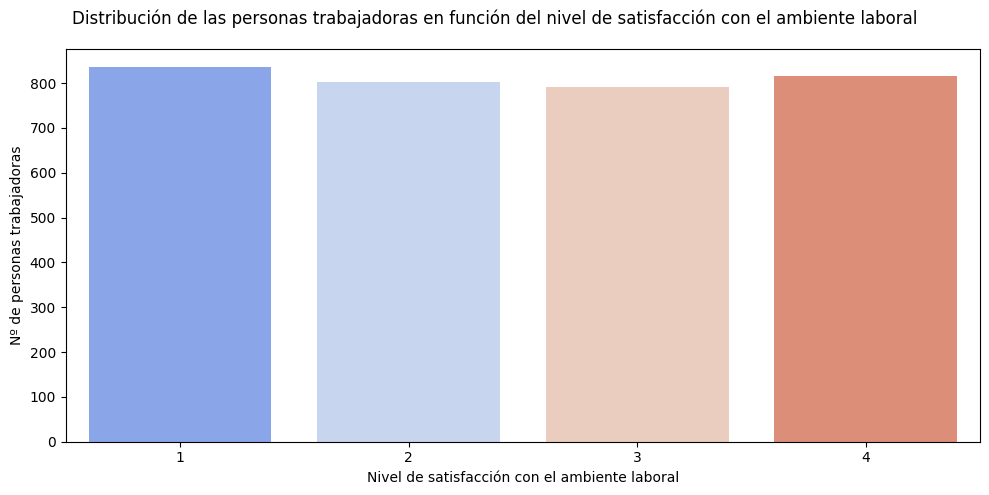

In [ ]:
# Definimos el orden
orden_environmentsatisfaction = ["1", "2", "3", "4"]

# Creamos la gráfica
plt.figure(figsize=(10, 5)) 
sns.barplot(
    x="environmentsatisfaction", 
    y="employeenumber", 
    data=df,
    ci=None,
    palette="coolwarm",
    order=orden_environmentsatisfaction
)
plt.xlabel("Nivel de satisfacción con el ambiente laboral")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de satisfacción con el ambiente laboral")
plt.tight_layout()

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_1744\3114065318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


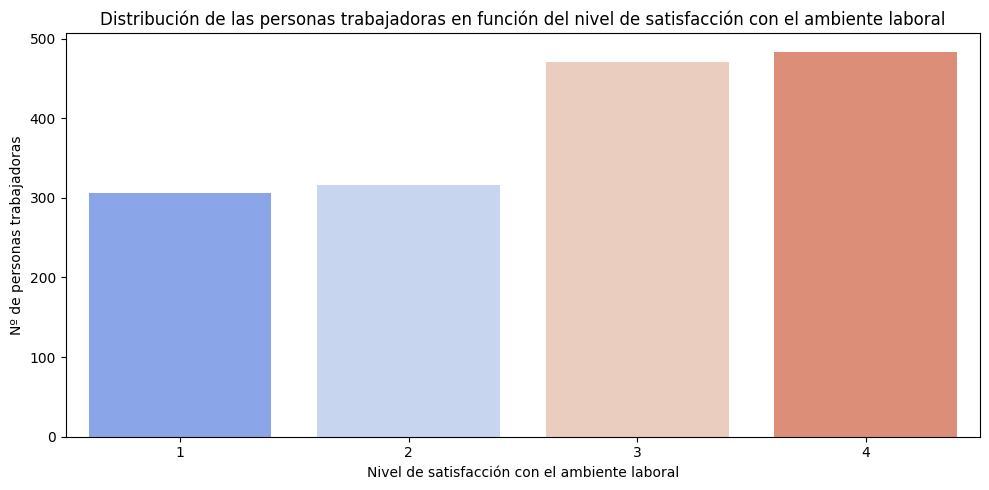

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x="environmentsatisfaction",
    data=df,
    palette="coolwarm",
    order=["1", "2", "3", "4"]  
)
plt.xlabel("Nivel de satisfacción con el ambiente laboral")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de las personas trabajadoras en función del nivel de satisfacción con el ambiente laboral")
plt.tight_layout()
plt.show()

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_13168\106927136.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobinvolvement",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_13168\106927136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "jobinvolvement",


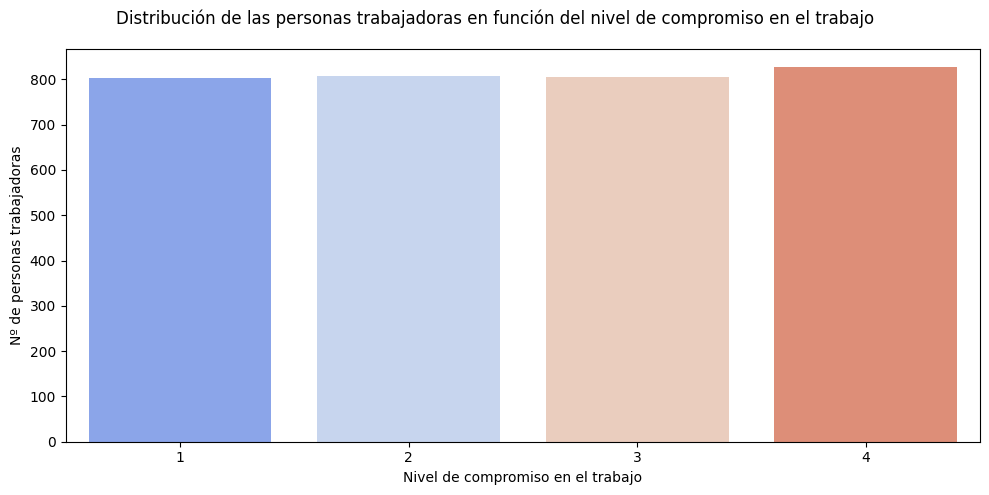

In [19]:
orden_jobinvolvement = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "jobinvolvement", 
            y = "employeenumber", 
            data = df,
            ci = None,
            palette = "coolwarm",
            order = orden_jobinvolvement)
plt.xlabel("Nivel de compromiso en el trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de compromiso en el trabajo")
plt.tight_layout()

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_13168\2746429903.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobsatisfaction",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_13168\2746429903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "jobsatisfaction",


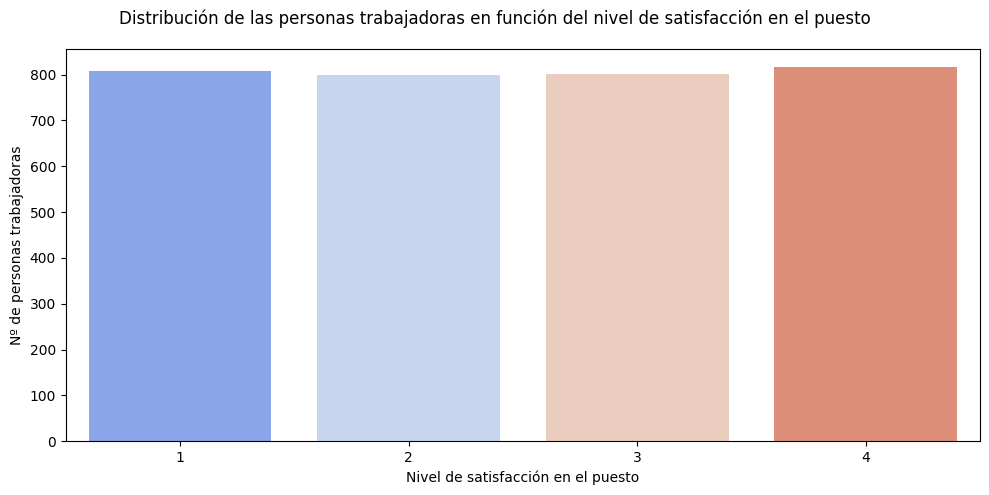

In [20]:
orden_jobsatisfaction = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "jobsatisfaction", 
            y = "employeenumber", 
            data = df,
            ci = None,
            palette = "coolwarm",
            order = orden_jobinvolvement)
plt.xlabel("Nivel de satisfacción en el puesto")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de satisfacción en el puesto")
plt.tight_layout()

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_13168\3582552254.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "relationshipsatisfaction",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_13168\3582552254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "relationshipsatisfaction",


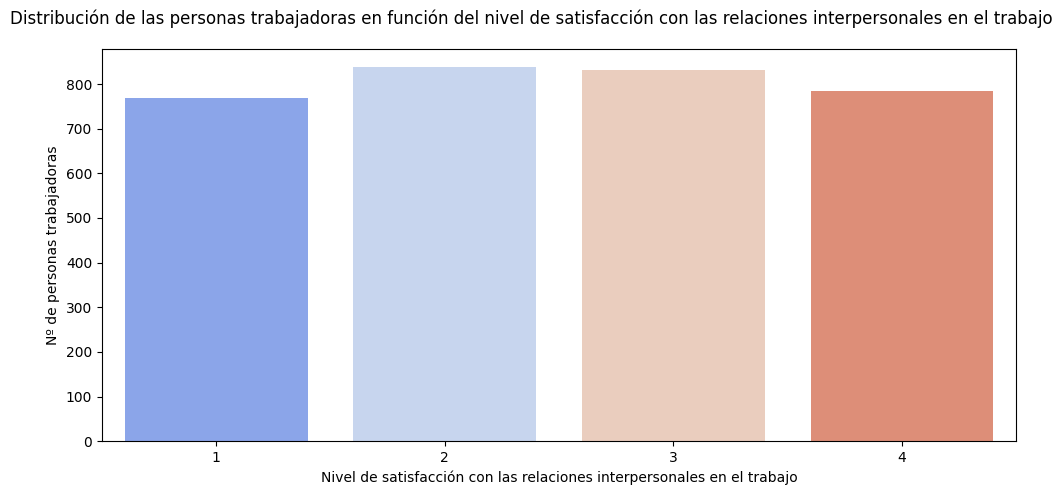

In [21]:
orden_jobsatisfaction = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "relationshipsatisfaction", 
            y = "employeenumber", 
            data = df,
            ci = None,
            palette = "coolwarm",
            order = orden_jobinvolvement)
plt.xlabel("Nivel de satisfacción con las relaciones interpersonales en el trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de satisfacción con las relaciones interpersonales en el trabajo")
plt.tight_layout()

In [22]:
# Se hacen agrupaciones en función de los niveles de satisfacción de distintas variables y su media salarial, para poder ver si el salario está relacionado con el nivel de satisfacción. 
df_sal_satis = df.groupby("environmentsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis

,environmentsatisfaction,salary
0,1,68268.219832
1,2,61455.544377
2,3,66615.584074
3,4,65917.402043
4,10,28111.130000
5,11,50148.413333
6,12,72241.852857
7,13,47024.325000
8,14,71201.182000
9,15,126628.535000


In [23]:
df_sal_satis_2 = df.groupby("jobinvolvement").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_2

,jobinvolvement,salary
0,1,73241.312022
1,2,65809.551330
2,3,65472.104042
3,4,61565.288476


In [24]:
df_sal_satis_3 = df.groupby("jobsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_3

,jobsatisfaction,salary
0,1,66263.992303
1,2,65111.057980
2,3,64761.926840
3,4,66225.699222


In [25]:
df_sal_satis_4 = df.groupby("relationshipsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_4

,relationshipsatisfaction,salary
0,1,61980.384752
1,2,66406.910118
2,3,64626.708909
3,4,68367.224103


C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_13168\4032883066.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobsatisfaction",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_13168\4032883066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "jobsatisfaction",


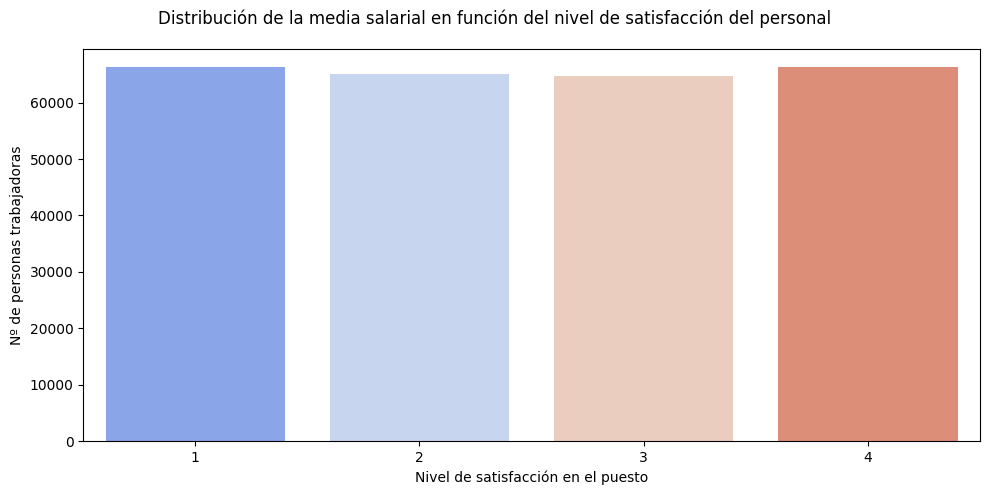

In [26]:
orden_jobsatisfaction = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "jobsatisfaction", 
            y = "salary", 
            data = df_sal_satis_3,
            ci = None,
            palette = "coolwarm",
            order = orden_jobsatisfaction)
plt.xlabel("Nivel de satisfacción en el puesto")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de la media salarial en función del nivel de satisfacción del personal")
plt.tight_layout()

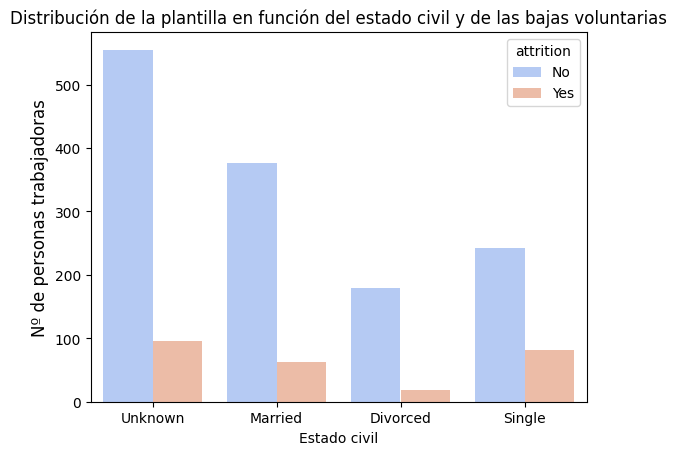

<Figure size 1200x600 with 0 Axes>

In [27]:
sns.countplot(data=df, x='maritalstatus', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función del estado civil y de las bajas voluntarias')
plt.xlabel('Estado civil', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

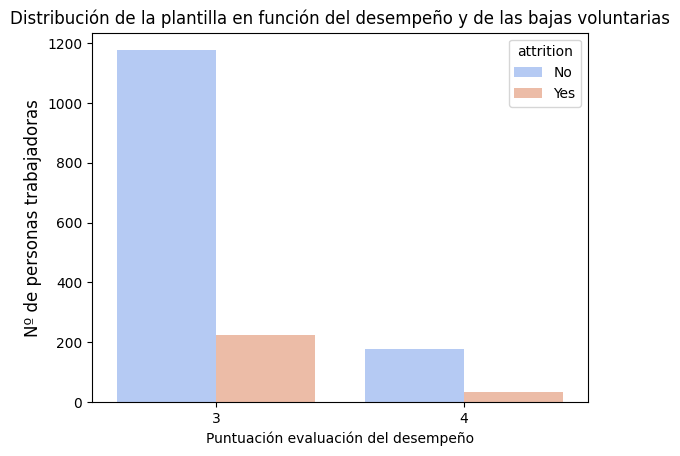

<Figure size 1200x600 with 0 Axes>

In [28]:
sns.countplot(data=df, x='performancerating', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función del desempeño y de las bajas voluntarias')
plt.xlabel('Puntuación evaluación del desempeño', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

In [29]:
sns.countplot(data=df, x='standardhours', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función del tipo de jornada y bajas voluntarias')
plt.xlabel('Tipo de jornada', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.figure(figsize=(12, 6)) 
plt.tight_layout() 
plt.show()

ValueError: Could not interpret value `standardhours` for `x`. An entry with this name does not appear in `data`.